## Importando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

## Carregando Dataset

In [2]:
df_train = pd.read_csv('cars_training.csv', encoding='utf16', sep= '\t')
df_test = pd.read_csv('cars_test.csv', encoding='utf16', sep= '\t')


In [3]:
df_train.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.590084
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.0,62979.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.332634
2,56414460810621048900295678236538171981,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.0,44070.0,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.814472
3,56862509826849933428086372390159405545,14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.0,85357.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.358857
4,338980975753200343894519909855598027197,8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.0,71491.0,Automática,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.763891


## Análise 1: Distribuição de carros por ano de lançamento
Essa estatística nos permite compreender a distribuição dos carros em relação ao ano de fabricação. Ao analisar os dados, podemos identificar a proporção de carros fabricados em diferentes anos e, assim, detectar possíveis tendências ao longo do tempo, como a popularidade de modelos mais antigos ou mais recentes.

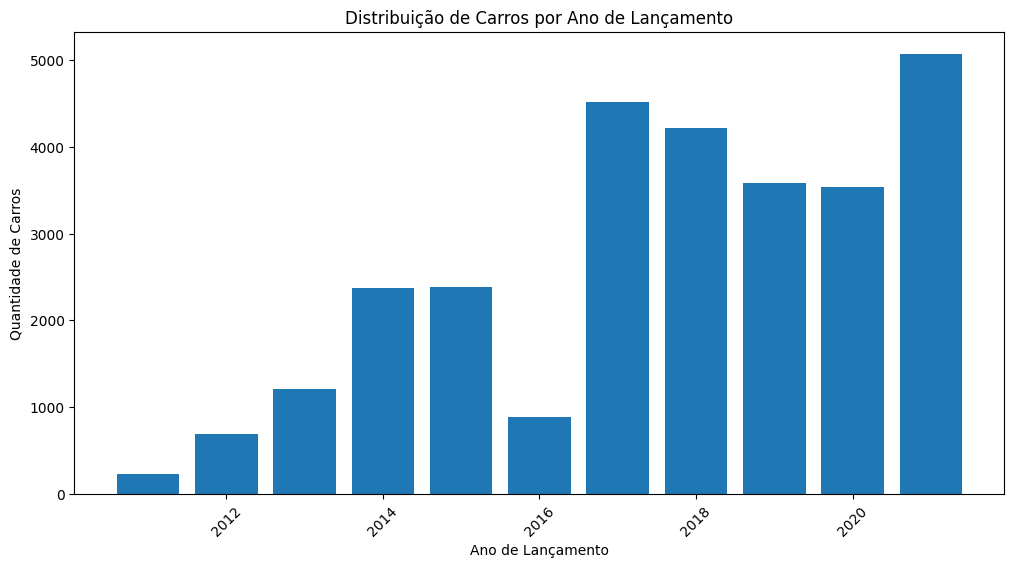

In [4]:
df_train_filtered = df_train[(df_train['ano_modelo'] > 2010) & (df_train['ano_modelo'] < 2022)]
plt.figure(figsize=(12, 6))
plt.bar(df_train_filtered['ano_modelo'].value_counts().index, df_train_filtered['ano_modelo'].value_counts().values)
plt.xlabel('Ano de Lançamento')
plt.ylabel('Quantidade de Carros')
plt.title('Distribuição de Carros por Ano de Lançamento')
plt.xticks(rotation=45)
plt.show()



## Análise 2: Dono aceita troca
Essa estatística nos informa sobre a proporção de carros cujos proprietários estão dispostos a aceitar uma troca. Isso pode ser relevante para entender o comportamento do mercado de carros usados, a demanda por diferentes tipos de veículos e a disposição dos proprietários em negociar suas ofertas.

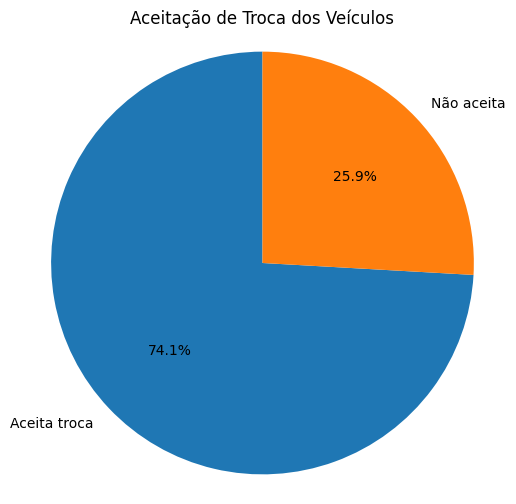

In [5]:
df_train['dono_aceita_troca'].fillna('Não aceita', inplace=True)
aceita_troca_counts = df_train['dono_aceita_troca'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(aceita_troca_counts, labels=aceita_troca_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Aceitação de Troca dos Veículos')
plt.axis('equal')  
plt.show()

## Análise 3: Distribuição de carros por Quilometros rodados
Essa estatística nos ajuda a entender como os carros estão distribuídos em relação à quantidade de quilômetros rodados. Podemos observar se a maioria dos carros tem baixa quilometragem (indicando que são mais novos ou pouco usados) ou alta quilometragem (indicando que são mais antigos ou muito utilizados). Isso pode ser útil para avaliar a condição geral dos veículos anunciados.

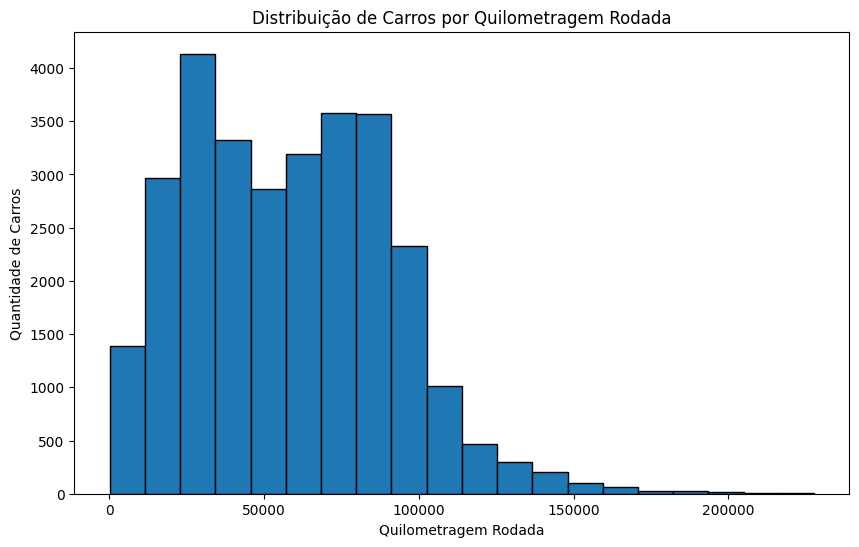

In [6]:
df_filtered = df_train[df_train['hodometro'] < 230000]

plt.figure(figsize=(10, 6))
plt.hist(df_filtered['hodometro'], bins=20, edgecolor='black')
plt.xlabel('Quilometragem Rodada')
plt.ylabel('Quantidade de Carros')
plt.title('Distribuição de Carros por Quilometragem Rodada')
plt.show()


## Análise Exploratória de Dados

### Hipótese 1: Veículos mais recentes têm maior probabilidade de serem anunciados com garantia de fábrica.

Justificativa: Pode-se inferir que carros mais recentes tendem a ser comercializados com a garantia de fábrica, uma vez que são menos propensos a apresentar problemas mecânicos.

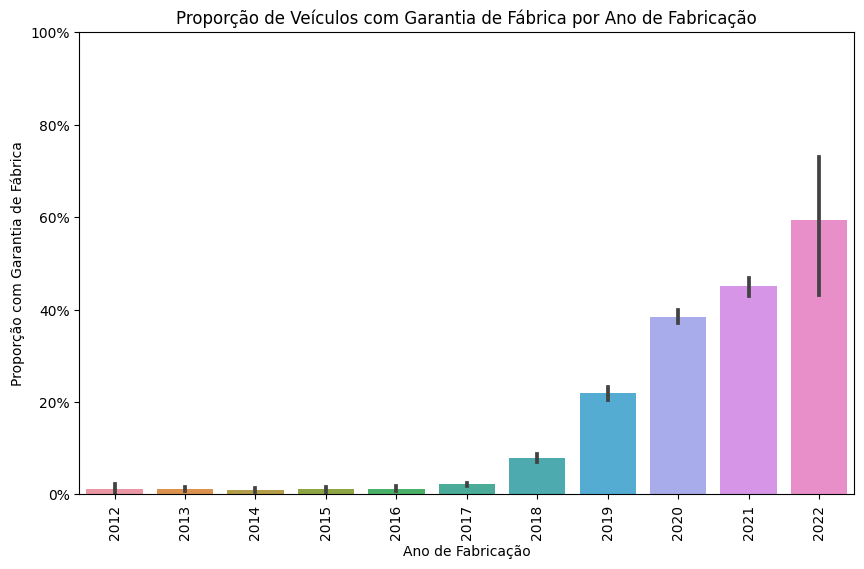

In [7]:
df_filtered = df_train[df_train['ano_de_fabricacao'] >= 2012].copy()

df_filtered['tem_garantia_de_fabrica'] = df_filtered['garantia_de_fábrica'].apply(lambda x: 1 if x == 'Garantia de fábrica' else 0)

plt.figure(figsize=(10, 6))
sns.barplot(x='ano_de_fabricacao', y='tem_garantia_de_fabrica', data=df_filtered)
plt.xlabel('Ano de Fabricação')
plt.ylabel('Proporção com Garantia de Fábrica')
plt.title('Proporção de Veículos com Garantia de Fábrica por Ano de Fabricação')
plt.xticks(rotation=90)
plt.ylim(0, 1)  
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], ['0%', '20%', '40%', '60%', '80%', '100%']) 
plt.show()



Resposta: Com base na análise exploratória de dados realizada no conjunto de treinamento, podemos confirmar que a hipótese de que veículos mais recentes têm maior probabilidade de serem anunciados com garantia de fábrica foi validada. Através de um gráfico de barras, observamos que a proporção de veículos com garantia de fábrica é consistentemente maior para os anos de fabricação mais recentes.

### Hipótese 2: A localização do vendedor influencia a disponibilidade de veículos com garantia de fábrica.
Justificativa: Alguns fabricantes podem oferecer condições diferentes para garantias em diferentes regiões, e a proximidade das concessionárias ou assistências técnicas pode afetar a disponibilidade da garantia de fábrica.


Relação entre o estado do vendedor e a disponibilidade de veículos com garantia de fábrica:
Acre (AC)                    6.90%
Alagoas (AL)                46.40%
Amazonas (AM)               17.65%
Bahia (BA)                   8.44%
Ceará (CE)                   1.45%
Espírito Santo (ES)         42.86%
Goiás (GO)                  23.57%
Maranhão (MA)                0.00%
Mato Grosso (MT)             6.06%
Mato Grosso do Sul (MS)     37.14%
Minas Gerais (MG)           14.87%
Paraná (PR)                 15.40%
Paraíba (PB)                 0.93%
Pará (PA)                   22.97%
Pernambuco (PE)              6.29%
Piauí (PI)                   0.00%
Rio Grande do Norte (RN)    10.00%
Rio Grande do Sul (RS)      17.07%
Rio de Janeiro (RJ)         16.17%
Rondônia (RO)                0.00%
Roraima (RR)                 0.00%
Santa Catarina (SC)         14.34%
Sergipe (SE)                12.50%
São Paulo (SP)              14.09%
Tocantins (TO)               5.00%


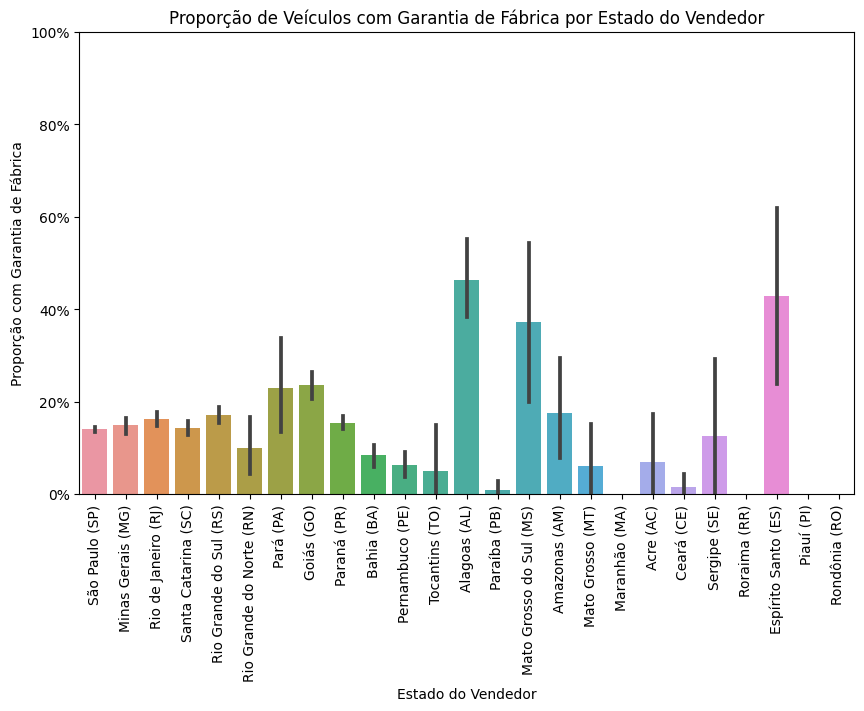

In [8]:
vendedores_por_cidade = df_train['cidade_vendedor'].value_counts()
vendedores_por_estado = df_train['estado_vendedor'].value_counts()

print("\nRelação entre o estado do vendedor e a disponibilidade de veículos com garantia de fábrica:")

df_train['garantia_de_fábrica'] = df_train['garantia_de_fábrica'].apply(lambda x: 1 if x == 'Garantia de fábrica' else 0)

media_garantia_por_estado = df_train.groupby('estado_vendedor')['garantia_de_fábrica'].mean()
resultado_formatado = (media_garantia_por_estado * 100).apply(lambda x: f'{x:.2f}%')
resultado_formatado.index.name = None
print(resultado_formatado.to_string(name=False))

plt.figure(figsize=(10, 6))
sns.barplot(x='estado_vendedor', y='garantia_de_fábrica', data=df_train)
plt.xlabel('Estado do Vendedor')
plt.ylabel('Proporção com Garantia de Fábrica')
plt.title('Proporção de Veículos com Garantia de Fábrica por Estado do Vendedor')
plt.xticks(rotation=90)

plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.gca().set_ylim(0, 1)

plt.show()


Resposta: A hipótese de que a localização do vendedor (estado) influencia a disponibilidade de veículos com garantia de fábrica foi parcialmente confirmada pelos dados analisados. Observamos que a proporção de veículos com garantia de fábrica varia consideravelmente entre os diferentes estados.

Analisando os resultados, podemos perceber que alguns estados apresentam uma proporção alta de veículos com garantia de fábrica, como Alagoas (AL) com 46.4% e Espírito Santo (ES) com 42.9%. Por outro lado, alguns estados têm proporções muito baixas, como Maranhão (MA), Piauí (PI), Rondônia (RO) e Roraima (RR), onde nenhum veículo apresenta garantia de fábrica.

### Hipótese 3: A proporção de revisões feitas em Concessionárias estão relacionadas ao Ano de Fabricação.
Justificativa: Carros fabricados em anos mais recentes podem ter maior probabilidade de terem suas revisões realizadas em concessionárias.

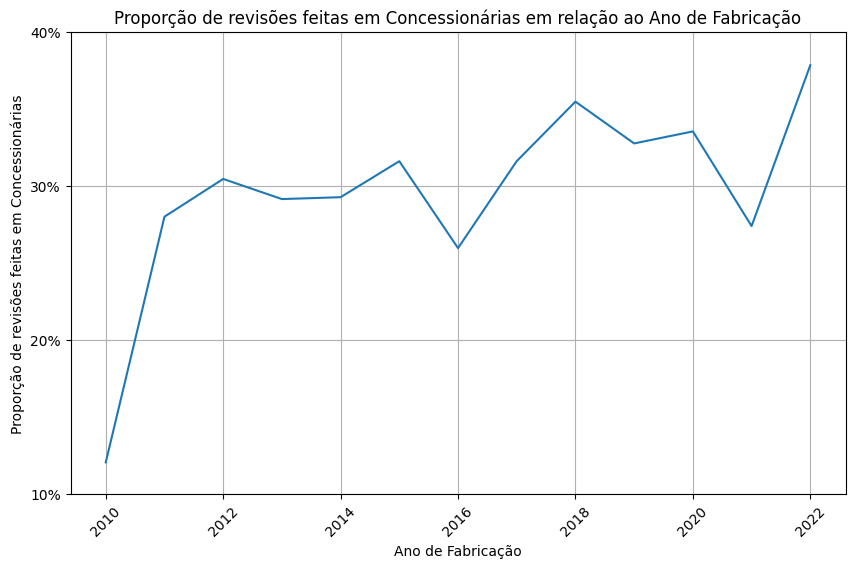

In [9]:

df_filtered = df_train[df_train['ano_de_fabricacao'] >= 2010]

prop_por_ano = df_filtered.groupby('ano_de_fabricacao')['revisoes_concessionaria'].apply(lambda x: (x == 'Todas as revisões feitas pela concessionária').mean()).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='ano_de_fabricacao', y='revisoes_concessionaria', data=prop_por_ano)
plt.title('Proporção de revisões feitas em Concessionárias em relação ao Ano de Fabricação')
plt.xlabel('Ano de Fabricação')
plt.ylabel('Proporção de revisões feitas em Concessionárias')
plt.grid(True)
plt.yticks([0.1, 0.2, 0.3, 0.4], ['10%', '20%', '30%', '40%'])
plt.xticks(rotation=45) 
plt.show()

Com base nesses resultados, podemos concluir que a hipótese parece ser parcialmente confirmada. Os anos de fabricação dos veículos parecem estar relacionados à proporção de revisões feitas em concessionárias, mas existem variações ao longo do tempo.

## Perguntas de negócio
a. Qual o melhor estado cadastrado na base de dados para se vender um
carro de marca popular e por quê?

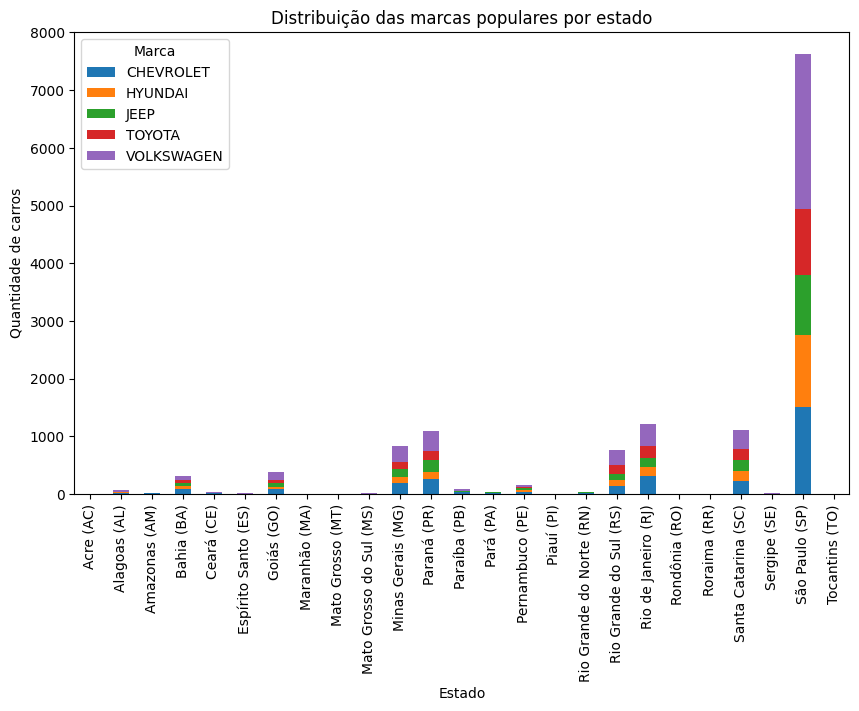

In [10]:
marcas_populares = df_train['marca'].value_counts().index[:5]

carros_populares = df_train[df_train['marca'].isin(marcas_populares)]

populares_por_estado = carros_populares.groupby(['estado_vendedor', 'marca']).size().unstack()

populares_por_estado.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribuição das marcas populares por estado')
plt.xlabel('Estado')
plt.ylabel('Quantidade de carros')
plt.legend(title='Marca', loc='upper left')
plt.show()

Resposta: Com base na análise da distribuição das marcas populares por estado, o estado de São Paulo (SP) parece ser o melhor estado cadastrado na base de dados para se vender um carro de marca popular. Isso ocorre porque São Paulo (SP) apresenta a maior quantidade de carros das marcas populares entre todos os estados listados.

b. Qual o melhor estado para se comprar uma picape com transmissão
automática e por quê?

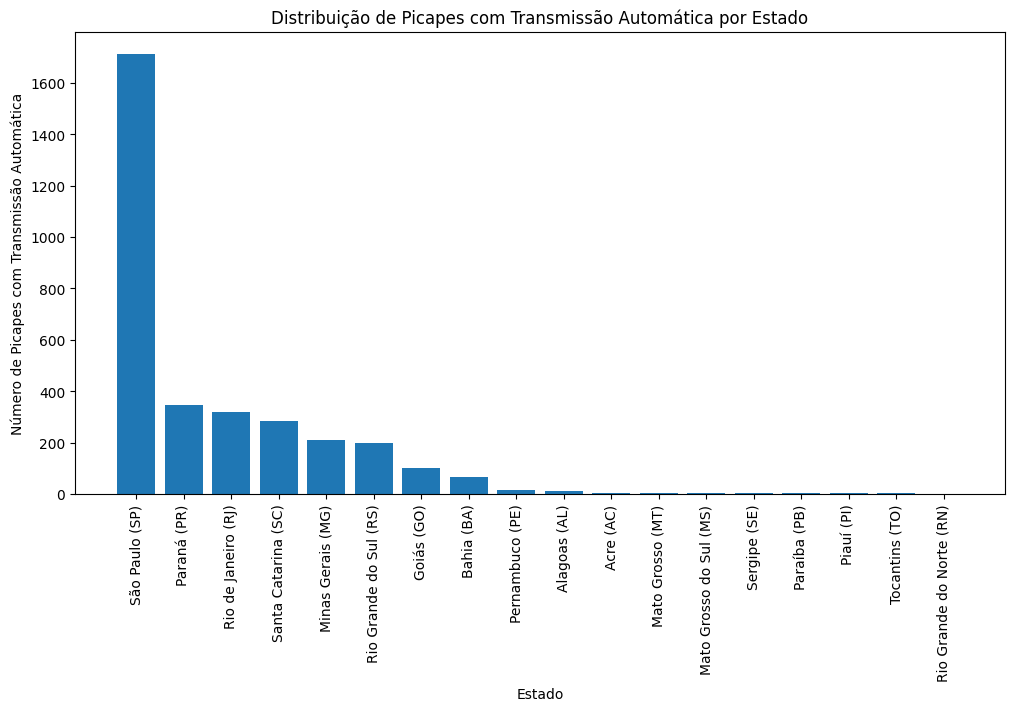

In [11]:
picapes_automaticas = df_train[df_train['tipo'] == 'Picape'] 
picapes_automaticas = picapes_automaticas[picapes_automaticas['cambio'] == 'Automática']  

picapes_por_estado = picapes_automaticas['estado_vendedor'].value_counts()


plt.figure(figsize=(12, 6))
plt.bar(picapes_por_estado.index, picapes_por_estado.values)
plt.xlabel('Estado')
plt.ylabel('Número de Picapes com Transmissão Automática')
plt.title('Distribuição de Picapes com Transmissão Automática por Estado')
plt.xticks(rotation=90)
plt.show()

Resposta: São Paulo se destaca como o estado com a maior disponibilidade de picapes com transmissão automática para compra. Essa predominância pode sugerir uma demanda significativa ou alta popularidade por esse tipo de veículo na região, o que, por sua vez, pode influenciar tanto a variedade de opções disponíveis no mercado de São Paulo quanto os preços dessas picapes com transmissão automática.

c. Qual o melhor estado para se comprar carros que ainda estejam dentro
da garantia de fábrica e por quê?

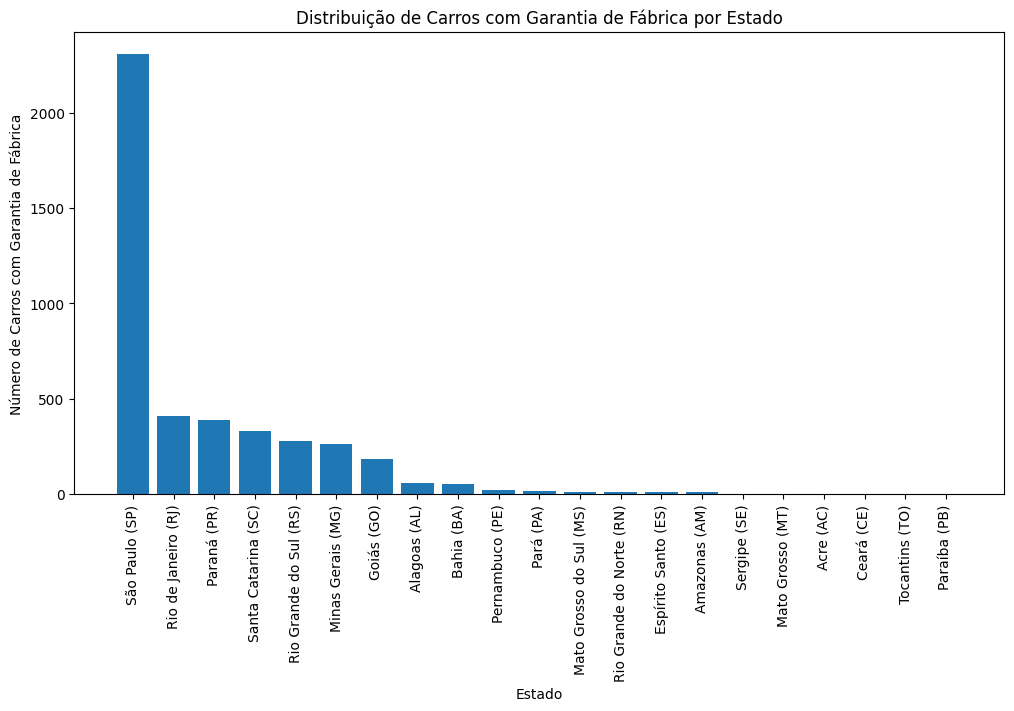

In [12]:
carros_garantia_fabrica = df_train[df_train['garantia_de_fábrica'] == 1]
carros_por_estado = carros_garantia_fabrica['estado_vendedor'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(carros_por_estado.index, carros_por_estado.values)
plt.xlabel('Estado')
plt.ylabel('Número de Carros com Garantia de Fábrica')
plt.title('Distribuição de Carros com Garantia de Fábrica por Estado')
plt.xticks(rotation=90)
plt.show()

Resposta: Podemos concluir que São Paulo (SP) é o estado com a maior oferta de carros que ainda estão dentro da garantia de fábrica. Esse resultado indica que São Paulo possui uma quantidade significativamente maior de carros anunciados com essa característica em comparação com outros estados.

## Previsão do preço a partir dos dados

### Questão - Explique como você faria a previsão do preço a partir dos dados.

No contexto deste projeto, o objetivo é fazer previsões para a variável "preço" dos veículos com base em informações fornecidas pelas features, como hodômetro (quilometragem) e ano de fabricação.

### Quais variáveis e/ou suas transformações você utilizou e por quê?

Foram utilizadas duas variáveis como features para a previsão do preço dos veículos:

Hodômetro (hodometro): Essa variável representa o valor registrado no hodômetro do veículo anunciado, que indica a quilometragem percorrida pelo carro. É uma informação importante, pois a quilometragem pode influenciar diretamente no preço do veículo. Carros com quilometragem mais alta tendem a ter preços menores em comparação com carros com quilometragem mais baixa, uma vez que a quilometragem está relacionada à idade e ao desgaste do veículo.

Ano de Fabricação (ano_de_fabricacao): Essa variável representa o ano de fabricação do veículo anunciado. É uma informação crucial para a precificação de carros, pois a idade do veículo é um fator importante na determinação do seu preço. Carros mais recentes costumam ter preços mais altos do que carros mais antigos.

### Qual tipo de problema estamos resolvendo (regressão, classificação)?

Estamos usando a biblioteca LinearRegression para criar um modelo de regressão linear. Esse modelo é capaz de aprender a relação linear entre as características (quilometragem e ano de fabricação) e o preço dos carros, para fazer previsões contínuas de preços com base nesses dados de treinamento. Portanto, é um problema de regressão.

### Qual modelo melhor se aproxima dos dados e quais seus prós e contras?

 O modelo utilizado foi a regressão linear. Seus prós são simplicidade, interpretabilidade e eficiência computacional. Porém, ele é limitado a relações lineares, sensível a outliers e não captura relações complexas.

### Qual medida de performance do modelo foi escolhida e por quê?

A medida de performance escolhida foi o RMSE (Root Mean Squared Error) porque é uma métrica comum para avaliar modelos de regressão, sendo facilmente interpretável e sensível a erros grandes.

In [13]:
features = ['id', 'hodometro', 'ano_de_fabricacao']

df_train = df_train.dropna(subset=features)

X = df_train[features]
y = df_train['preco']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

df_test_with_predictions = X_test.copy()
df_test_with_predictions['id'] = df_train.loc[X_test.index, 'id']
df_test_with_predictions['preco_real'] = y_test
df_test_with_predictions['preco_previsto'] = y_pred

resultado = (df_test_with_predictions[['id', 'preco_previsto']])
print(resultado)
resultado.to_csv('predicted.csv', encoding='utf16', sep='\t', index=False)

rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


                                            id  preco_previsto
7936   174158513088796592806405616354018132916   133050.144938
22472  258739094963319078702833465174152949981   132827.506301
18848  308044418635815622191514066805307476358   132697.721547
24252  274993703978196215848880951781280902334   132784.719838
17123  231848848645830507022484988656002410939   132898.288598
...                                        ...             ...
14865   22155484777513952807030083644719723176   133450.257426
13630  337705633772424181186473479170070754744   132619.645322
3509   162330644169763187610463852723657434957   133081.279042
27544   10714909650882460367172735124314912851   133480.372070
11176  212731573938093978465585468453912103249   132948.610360

[5917 rows x 2 columns]
RMSE: 79651.50251248572
